In [5]:
import Kalman as klm
import pandas as pd
from matplotlib import pyplot as plt
import math

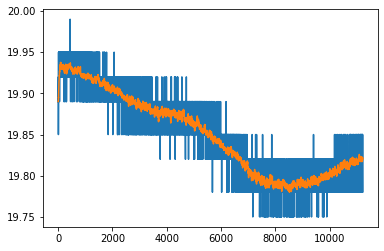

In [6]:

#WINDOW_SIZE = 500


if __name__ == "__main__":
    f = pd.read_csv("./noise.csv")
    #print(f)
    # print(f['Temperature'])
    data = f['Temperature']
    x_0 = data[0]
    x = x_0
    #y = x_0
    P = math.sqrt((2.05*2)/12) # covariance of the error
    H = 1  # B
    R = 10 # covariance of the output
    # initial estimated covariance
    Q = R #!! In this case the state and the output are the same
    xs = [x_0]
    #ys = [x_0]
    for index, d in enumerate(data):
        #w = index-WINDOW_SIZE
        #for t in range(w if w >= 0 else 0, index):
        x = klm.kalman_filter(xs[-1], d, P, H, R, Q)
        xs.append(x)
    plt.plot(data)
    plt.plot(range(len(xs)), xs)
    with open("output.csv", 'w') as wf:
        wf.write("Smoothed Temperatures\n")
        for x in xs:
            wf.write(f"{x}\n")